# Зачетная работа по предмету “Системы компьютерной математики.
## Выполнил: Ефимов Андрей Александрович, 3821Б1ПР1
## Преподаватель: Золотых Николай Юрьевич
## 7. Хорошо обусловленные матрицы

Провести серию экспериментов, тестирующую функции `scipy.linalg.solve`, `numpy.linalg.cond`
на хорошо обусловленных матрицах. Число
обусловленности на следующих классах матриц с ростом порядка матрицы $n$
растет *умеренно*:

* $A=LU$, где $L$, $U$ – случайные нижняя треугольная и верхняя треугольная
матрицы соответственно с диагональным преобладанием.

* $A=LL^T$, где $L$ – случайные нижняя треугольная матрица с диагональным преобладанием.

Экспериментальным путем для каждого из перечисленных классов установить
диапазон изменения порядка матрицы, при котором число обусловленности не
превосходит ведичины порядка $10^{16}$. Построить графики значений, выдаваемых
функцией `cond`.
Построить графики используемого этими функциями времени. Для каждой матрицы
задать случайно решение $x$. По матрице $A$ и решению $x$ сгенерировать правую часть 
системы линейных уравнений $b$. Решить систему $Ax=b$, используя команду
`solve`. Построить графики относительной ошибки решения и невязки. Объяснить результаты.

##### Импортируем библиотеки, которые нам понадобятся

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numpy.linalg import cond
from scipy.linalg import solve
%matplotlib inline

Зададим нужные размеры и диапазоны чисел

In [2]:
N = 200 # Максимальная размерность матрицы
R = 100 # Диапазон генерируемых чисел

##### Функия приводящая к преобладающей диагонали - увеличение нужного элемента на сумму остальных в строке

In [3]:
def diag_dom(x, n):
    abs_x = np.abs(x)
    diags = np.sum(abs_x, axis = 1)
    for i in range(n): x[i][i] += diags[i]

##### Создание матрицы вида LU

In [4]:
def LU(n):
    l = np.tril(np.random.randint(0, R, (n, n)))
    diag_dom(l, n)
    u = np.triu(np.random.randint(0, R, (n, n)))
    diag_dom(u, n)
    return np.dot(l, u)

##### Создание матрицы вида LLt

In [5]:
def LLt(n):
    l = np.tril(np.random.randint(0, R, (n, n)))
    diag_dom(l, n)
    lt = np.transpose(l)
    return np.dot(l, lt)

##### Заполняем массивы

In [6]:
A1 = []
n = 1
while n <= N: # заполнение массива матрицы вида LU
    m = LU(n)
    if cond(m) < 10**16:
        A1.append(m)
        n += 1
cond_A1 = []
times_A1 = []
for A in A1: # заполняем массив с числами cond и временем работы этой функции для матриц вида LU
    ts = time.time()
    c = cond(A)
    te = time.time()
    cond_A1.append(c)
    times_A1.append(te-ts)
A2 = []
n = 1
while n <= N: # заполняем массив матрицы вида LLt
    m = LLt(n)
    if cond(m) < 10**16:
        A2.append(m)
        n += 1
cond_A2 = []
times_A2 = []
for A in A2: # заполняем массивы с числами cond и временами работы этой функции для матрицы вида LLt
    ts = time.time()
    c = cond(A)
    te = time.time()
    cond_A2.append(c)
    times_A2.append(te-ts)

##### Рисуем график чисел cond для матриц LU

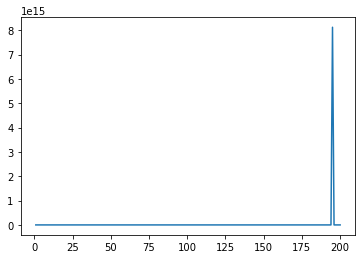

In [7]:
nn = [i for i in range(1, N + 1)]
plt.plot(nn, cond_A1) 

##### график чисел cond для матриц LLt

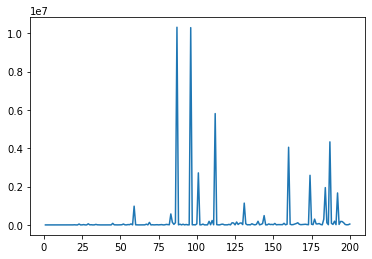

In [8]:
plt.plot(nn, cond_A2)

##### График времени работы функции cond для матриц LU

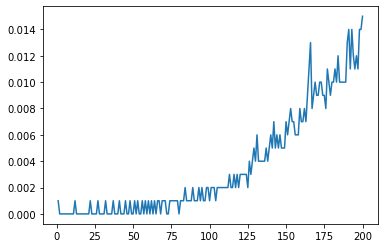

In [9]:
plt.plot(nn, times_A1)

##### График времени работы функции cond для матриц LLt

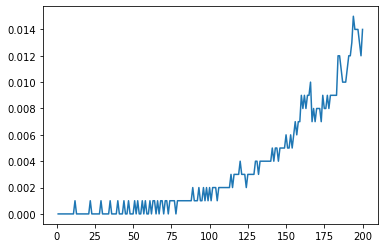

In [10]:
plt.plot(nn, times_A2)

### Случайная генерация

# Выводы

## 1.Экспериментальным путем для каждого из перечисленных классов установлен диапазон изменения порядка матрицы, при котором число обусловленности не превосходит величины порядка 10^16.
## 2.Построили графики:
* Чисел cond для матриц LU
* Чисел cond для матриц LLt
* Времени работы функции cond для матриц LU
* Времени работы функции cond для матриц LLt
## 3.Время вычислений функции cond не значительно увеличивается с увеличением порядка матрицы (Матрицы вида LU).
Время вычислений функции cond не значительно увеличивается с увеличением порядка матрицы (Матрицы вида LLt).

